In [1]:
# Load the dataset
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("StudentPerformanceAnalysis").getOrCreate()

data_path = "student_performance_data.csv"
df = spark.read.csv(data_path, header=True, inferSchema=True)

# Show the first few rows of the dataset
df.show()


24/07/27 20:09:52 WARN Utils: Your hostname, codespaces-c6b7cc resolves to a loopback address: 127.0.0.1; using 10.0.1.115 instead (on interface eth0)
24/07/27 20:09:52 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/07/27 20:09:54 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


+---------+------+---+-----------------+--------------+----+-----------+-----------+-------------------------+
|StudentID|Gender|Age|StudyHoursPerWeek|AttendanceRate| GPA|      Major|PartTimeJob|ExtraCurricularActivities|
+---------+------+---+-----------------+--------------+----+-----------+-----------+-------------------------+
|        1|  Male| 24|               37|         90.75|3.47|       Arts|        Yes|                       No|
|        2|Female| 22|               37|          74.9|2.32|  Education|         No|                       No|
|        3|  Male| 22|               10|         53.36|2.38|   Business|         No|                       No|
|        4|  Male| 24|               10|         70.26|3.46|    Science|        Yes|                       No|
|        5|  Male| 18|               19|         74.87|2.31|  Education|        Yes|                       No|
|        6|Female| 20|               17|         86.01|2.47|   Business|        Yes|                       No|
|

24/07/27 20:10:08 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


In [7]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, when

# Initialize Spark session
spark = SparkSession.builder.appName("StudentPerformanceAnalysis").getOrCreate()

# Load the dataset

data_path = "student_performance_data.csv"
df = spark.read.csv(data_path, header=True, inferSchema=True)

# Check for missing values
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

# Drop rows with missing values
df = df.dropna()
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol="Gender", outputCol="GenderIndex")
df = indexer.fit(df).transform(df)
df.show()


+---------+------+---+-----------------+--------------+---+-----+-----------+-------------------------+
|StudentID|Gender|Age|StudyHoursPerWeek|AttendanceRate|GPA|Major|PartTimeJob|ExtraCurricularActivities|
+---------+------+---+-----------------+--------------+---+-----+-----------+-------------------------+
|        0|     0|  0|                0|             0|  0|    0|          0|                        0|
+---------+------+---+-----------------+--------------+---+-----+-----------+-------------------------+

+---------+------+---+-----------------+--------------+----+-----------+-----------+-------------------------+-----------+
|StudentID|Gender|Age|StudyHoursPerWeek|AttendanceRate| GPA|      Major|PartTimeJob|ExtraCurricularActivities|GenderIndex|
+---------+------+---+-----------------+--------------+----+-----------+-----------+-------------------------+-----------+
|        1|  Male| 24|               37|         90.75|3.47|       Arts|        Yes|                       No|

In [9]:
# Check the schema of the DataFrame to see the actual column names
df.printSchema()


root
 |-- StudentID: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- StudyHoursPerWeek: integer (nullable = true)
 |-- AttendanceRate: double (nullable = true)
 |-- GPA: double (nullable = true)
 |-- Major: string (nullable = true)
 |-- PartTimeJob: string (nullable = true)
 |-- ExtraCurricularActivities: string (nullable = true)
 |-- GenderIndex: double (nullable = false)



In [10]:
from pyspark.sql.functions import col, count, when

# Check for missing values
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()


+---------+------+---+-----------------+--------------+---+-----+-----------+-------------------------+-----------+
|StudentID|Gender|Age|StudyHoursPerWeek|AttendanceRate|GPA|Major|PartTimeJob|ExtraCurricularActivities|GenderIndex|
+---------+------+---+-----------------+--------------+---+-----+-----------+-------------------------+-----------+
|        0|     0|  0|                0|             0|  0|    0|          0|                        0|          0|
+---------+------+---+-----------------+--------------+---+-----+-----------+-------------------------+-----------+



In [11]:
# Drop rows with missing values
df = df.dropna()


In [12]:
# Describe the DataFrame to get summary statistics
df.describe().show()


+-------+-----------------+------+------------------+------------------+------------------+------------------+-------+-----------+-------------------------+------------------+
|summary|        StudentID|Gender|               Age| StudyHoursPerWeek|    AttendanceRate|               GPA|  Major|PartTimeJob|ExtraCurricularActivities|       GenderIndex|
+-------+-----------------+------+------------------+------------------+------------------+------------------+-------+-----------+-------------------------+------------------+
|  count|              500|   500|               500|               500|               500|               500|    500|        500|                      500|               500|
|   mean|            250.5|  NULL|            20.956|            19.876| 74.99038000000003|2.9851599999999987|   NULL|       NULL|                     NULL|             0.488|
| stddev|144.4818327679989|  NULL|2.0005169672543515|11.471347244993952|14.565916830802095|0.5636203600123407|   NULL|  

In [13]:
# Select specific columns for descriptive statistics
df.select("StudyHoursPerWeek", "AttendanceRate", "GPA").describe().show()


+-------+------------------+------------------+------------------+
|summary| StudyHoursPerWeek|    AttendanceRate|               GPA|
+-------+------------------+------------------+------------------+
|  count|               500|               500|               500|
|   mean|            19.876| 74.99038000000003|2.9851599999999987|
| stddev|11.471347244993952|14.565916830802095|0.5636203600123407|
|    min|                 1|             50.01|               2.0|
|    max|                39|             99.97|              3.99|
+-------+------------------+------------------+------------------+



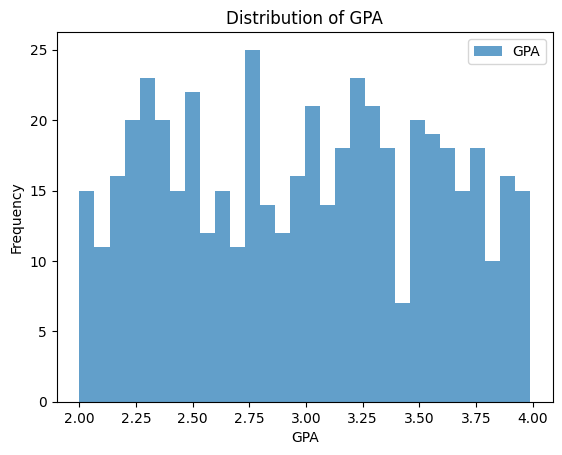

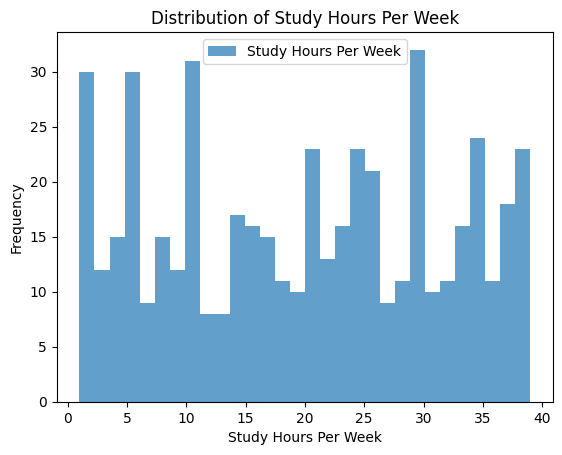

In [14]:
import matplotlib.pyplot as plt

# Convert Spark DataFrame to Pandas DataFrame for visualization
pandas_df = df.toPandas()

# Plot the distribution of GPA
plt.hist(pandas_df['GPA'], bins=30, alpha=0.7, label='GPA')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.title('Distribution of GPA')
plt.legend()
plt.show()

# Similarly, you can plot for other numeric columns
plt.hist(pandas_df['StudyHoursPerWeek'], bins=30, alpha=0.7, label='Study Hours Per Week')
plt.xlabel('Study Hours Per Week')
plt.ylabel('Frequency')
plt.title('Distribution of Study Hours Per Week')
plt.legend()
plt.show()


root
 |-- StudentID: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- StudyHoursPerWeek: integer (nullable = true)
 |-- AttendanceRate: double (nullable = true)
 |-- GPA: double (nullable = true)
 |-- Major: string (nullable = true)
 |-- PartTimeJob: string (nullable = true)
 |-- ExtraCurricularActivities: string (nullable = true)

+---------+------+---+-----------------+--------------+---+-----+-----------+-------------------------+
|StudentID|Gender|Age|StudyHoursPerWeek|AttendanceRate|GPA|Major|PartTimeJob|ExtraCurricularActivities|
+---------+------+---+-----------------+--------------+---+-----+-----------+-------------------------+
|        0|     0|  0|                0|             0|  0|    0|          0|                        0|
+---------+------+---+-----------------+--------------+---+-----+-----------+-------------------------+

+-------+-----------------+------+------------------+------------------+-----------------

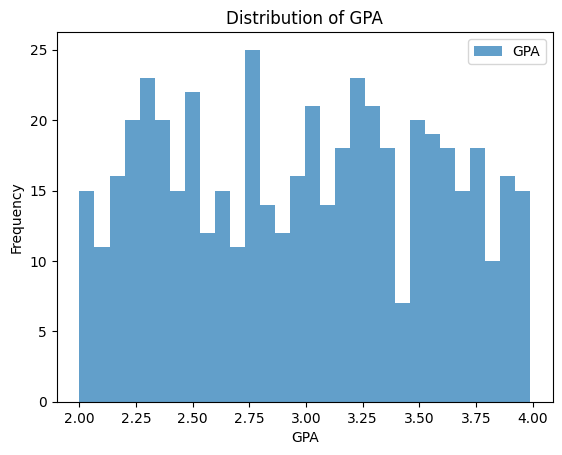

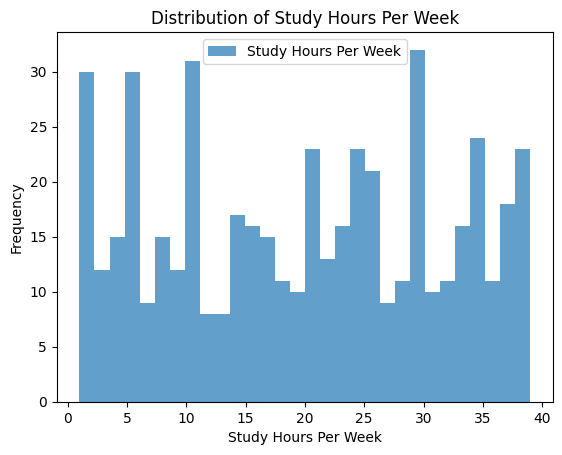

In [16]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, when

# Initialize Spark session
spark = SparkSession.builder.appName("StudentPerformanceAnalysis").getOrCreate()

# Load the dataset
data_path = "student_performance_data.csv"  # Update with your path
df = spark.read.csv(data_path, header=True, inferSchema=True)

# Check the schema
df.printSchema()

# Check for missing values
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

# Drop rows with missing values
df = df.dropna()

# Describe the DataFrame
df.describe().show()

# Descriptive statistics for specific columns
df.select("StudyHoursPerWeek", "AttendanceRate", "GPA").describe().show()

# Convert to Pandas DataFrame for visualization
pandas_df = df.toPandas()

# Plot the distribution of GPA
plt.hist(pandas_df['GPA'], bins=30, alpha=0.7, label='GPA')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.title('Distribution of GPA')
plt.legend()
plt.show()

# Plot the distribution of Study Hours Per Week
plt.hist(pandas_df['StudyHoursPerWeek'], bins=30, alpha=0.7, label='Study Hours Per Week')
plt.xlabel('Study Hours Per Week')
plt.ylabel('Frequency')
plt.title('Distribution of Study Hours Per Week')
plt.legend()
plt.show()


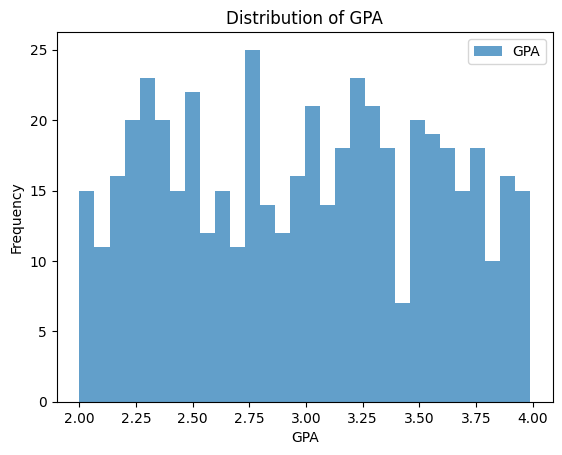

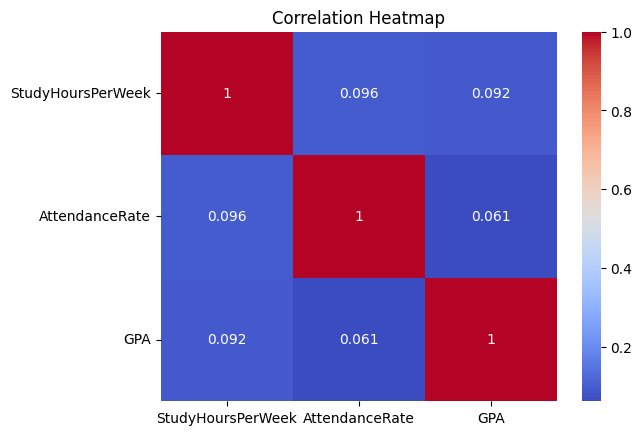

24/07/27 20:19:46 WARN Instrumentation: [93bd1e1c] regParam is zero, which might cause numerical instability and overfitting.
24/07/27 20:19:46 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/07/27 20:19:46 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS
24/07/27 20:19:46 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


R²: 0.011143254944659398


In [18]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, when
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Spark session
spark = SparkSession.builder.appName("StudentPerformanceAnalysis").getOrCreate()

# Load the dataset
data_path = "student_performance_data.csv"  # Update with your path
df = spark.read.csv(data_path, header=True, inferSchema=True)

# Data cleaning
df = df.dropna()

# Convert to Pandas for visualization
pandas_df = df.toPandas()

# Visualize GPA distribution
plt.hist(pandas_df['GPA'], bins=30, alpha=0.7, label='GPA')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.title('Distribution of GPA')
plt.legend()
plt.show()

# Correlation heatmap
corr_matrix = pandas_df[['StudyHoursPerWeek', 'AttendanceRate', 'GPA']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Feature Engineering and Modeling
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

feature_columns = ['StudyHoursPerWeek', 'AttendanceRate']
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')
df = assembler.transform(df)

lr = LinearRegression(featuresCol='features', labelCol='GPA')
lr_model = lr.fit(df)
print(f"R²: {lr_model.summary.r2}")


In [20]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml import Pipeline

# Initialize Spark session
spark = SparkSession.builder.appName("StudentPerformanceModel").getOrCreate()

# Load the dataset
data_path = "student_performance_data.csv"
df = spark.read.csv(data_path, header=True, inferSchema=True)

# Handle missing values (example: drop rows with any missing values)
df = df.dropna()

# Encode categorical variables
indexer = StringIndexer(inputCols=["Gender", "Major", "PartTimeJob", "ExtraCurricularActivities"], 
                        outputCols=["GenderIndex", "MajorIndex", "PartTimeJobIndex", "ExtraCurricularActivitiesIndex"])

# Assemble features
feature_columns = ['Age', 'StudyHoursPerWeek', 'AttendanceRate', 'GenderIndex', 'MajorIndex', 'PartTimeJobIndex', 'ExtraCurricularActivitiesIndex']
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')

# Pipeline
pipeline = Pipeline(stages=[indexer, assembler])
model_df = pipeline.fit(df).transform(df)


In [21]:
# You can create additional features if necessary
# Example: Feature scaling (if needed)
from pyspark.ml.feature import MinMaxScaler

scaler = MinMaxScaler(inputCol="features", outputCol="scaledFeatures")
scaled_df = scaler.fit(model_df).transform(model_df)


In [24]:
feature_columns = ['Age', 'StudyHoursPerWeek', 'AttendanceRate', 'GenderIndex', 'MajorIndex', 'PartTimeJobIndex', 'ExtraCurricularActivitiesIndex']
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')


In [33]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("StudentPerformanceModel").getOrCreate()
data_path = "student_performance_data.csv"  # Update this path to your CSV file
df = spark.read.csv(data_path, header=True, inferSchema=True).dropna()
from pyspark.ml.feature import StringIndexer, VectorAssembler, MinMaxScaler
from pyspark.ml import Pipeline
from pyspark.ml.regression import LinearRegression

# Define stages for the pipeline
indexer = StringIndexer(inputCols=["Gender", "Major", "PartTimeJob", "ExtraCurricularActivities"], 
                        outputCols=["GenderIndex", "MajorIndex", "PartTimeJobIndex", "ExtraCurricularActivitiesIndex"])
assembler = VectorAssembler(inputCols=['Age', 'StudyHoursPerWeek', 'AttendanceRate', 'GenderIndex', 'MajorIndex', 'PartTimeJobIndex', 'ExtraCurricularActivitiesIndex'], 
                            outputCol='features')
scaler = MinMaxScaler(inputCol="features", outputCol="scaledFeatures")

# Define the pipeline
pipeline = Pipeline(stages=[indexer, assembler, scaler])

# Fit the pipeline on the loaded DataFrame
pipeline_model = pipeline.fit(df)
training_data_transformed = pipeline_model.transform(df)
lr = LinearRegression(featuresCol='scaledFeatures', labelCol='GPA')
lr_model = lr.fit(training_data_transformed)
# Create new data
new_data = spark.createDataFrame([
    (1, "Female", 15, 10, 95.0, "Science", "No", "Yes"),
    (2, "Male", 16, 12, 85.0, "Math", "Yes", "No")
], ["StudentID", "Gender", "Age", "StudyHoursPerWeek", "AttendanceRate", "Major", "PartTimeJob", "ExtraCurricularActivities"])

# Transform new data using the fitted pipeline model
new_data_transformed = pipeline_model.transform(new_data)
# Make predictions
predictions = lr_model.transform(new_data_transformed)
predictions.select('StudentID', 'prediction').show()




24/07/27 20:25:45 WARN Instrumentation: [f418fd39] regParam is zero, which might cause numerical instability and overfitting.
24/07/27 20:25:47 ERROR Executor: Exception in task 0.0 in stage 82.0 (TID 66)  
org.apache.spark.SparkException: [FAILED_EXECUTE_UDF] Failed to execute user defined function (`StringIndexerModel$$Lambda/0x00007761590893d8`: (string) => double).
	at org.apache.spark.sql.errors.QueryExecutionErrors$.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala:198)
	at org.apache.spark.sql.errors.QueryExecutionErrors.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at o

Py4JJavaError: An error occurred while calling o1209.showString.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 82.0 failed 1 times, most recent failure: Lost task 0.0 in stage 82.0 (TID 66) (d9dc17df-80a3-432d-8c9a-0547d6cddf73.internal.cloudapp.net executor driver): org.apache.spark.SparkException: [FAILED_EXECUTE_UDF] Failed to execute user defined function (`StringIndexerModel$$Lambda/0x00007761590893d8`: (string) => double).
	at org.apache.spark.sql.errors.QueryExecutionErrors$.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala:198)
	at org.apache.spark.sql.errors.QueryExecutionErrors.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:388)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:893)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:893)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1144)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:642)
	at java.base/java.lang.Thread.run(Thread.java:1583)
Caused by: org.apache.spark.SparkException: Unseen label: Math. To handle unseen labels, set Param handleInvalid to keep.
	at org.apache.spark.ml.feature.StringIndexerModel.$anonfun$getIndexer$1(StringIndexer.scala:406)
	at org.apache.spark.ml.feature.StringIndexerModel.$anonfun$getIndexer$1$adapted(StringIndexer.scala:391)
	... 20 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2398)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2419)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2438)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:530)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:483)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:61)
	at org.apache.spark.sql.Dataset.collectFromPlan(Dataset.scala:4332)
	at org.apache.spark.sql.Dataset.$anonfun$head$1(Dataset.scala:3314)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:4322)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:546)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:4320)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:201)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:108)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:66)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:4320)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:3314)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:3537)
	at org.apache.spark.sql.Dataset.getRows(Dataset.scala:280)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:315)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:75)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:52)
	at java.base/java.lang.reflect.Method.invoke(Method.java:580)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:1583)
Caused by: org.apache.spark.SparkException: [FAILED_EXECUTE_UDF] Failed to execute user defined function (`StringIndexerModel$$Lambda/0x00007761590893d8`: (string) => double).
	at org.apache.spark.sql.errors.QueryExecutionErrors$.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala:198)
	at org.apache.spark.sql.errors.QueryExecutionErrors.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:388)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:893)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:893)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1144)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:642)
	... 1 more
Caused by: org.apache.spark.SparkException: Unseen label: Math. To handle unseen labels, set Param handleInvalid to keep.
	at org.apache.spark.ml.feature.StringIndexerModel.$anonfun$getIndexer$1(StringIndexer.scala:406)
	at org.apache.spark.ml.feature.StringIndexerModel.$anonfun$getIndexer$1$adapted(StringIndexer.scala:391)
	... 20 more


In [36]:
from pyspark.sql.functions import col, count, when
from pyspark.ml.feature import StringIndexer, VectorAssembler, MinMaxScaler
from pyspark.ml import Pipeline
from pyspark.ml.regression import LinearRegression

# Check for missing values
df.select([count(when(col(c).isNull(), c)).alias(c) for c in ["Gender", "Major", "PartTimeJob", "ExtraCurricularActivities"]]).show()

# Fill missing values
df = df.fillna({'Gender': 'Unknown', 'Major': 'Unknown', 'PartTimeJob': 'Unknown', 'ExtraCurricularActivities': 'Unknown'})

# Define stages for the pipeline
indexer = StringIndexer(inputCols=["Gender", "Major", "PartTimeJob", "ExtraCurricularActivities"], 
                        outputCols=["GenderIndex", "MajorIndex", "PartTimeJobIndex", "ExtraCurricularActivitiesIndex"],
                        handleInvalid="keep")
assembler = VectorAssembler(inputCols=['Age', 'StudyHoursPerWeek', 'AttendanceRate', 'GenderIndex', 'MajorIndex', 'PartTimeJobIndex', 'ExtraCurricularActivitiesIndex'], 
                            outputCol='features')
scaler = MinMaxScaler(inputCol="features", outputCol="scaledFeatures")

# Define the pipeline
pipeline = Pipeline(stages=[indexer, assembler, scaler])

# Fit the pipeline on the training data
pipeline_model = pipeline.fit(df)
training_data_transformed = pipeline_model.transform(df)

# Train the model
lr = LinearRegression(featuresCol='scaledFeatures', labelCol='GPA', regParam=0.1)
lr_model = lr.fit(training_data_transformed)

# Prepare new data for prediction
new_data = spark.createDataFrame([
    (1, "Female", 15, 10, 95.0, "Science", "No", "Yes"),
    (2, "Male", 16, 12, 85.0, "Math", "Yes", "No")
], ["StudentID", "Gender", "Age", "StudyHoursPerWeek", "AttendanceRate", "Major", "PartTimeJob", "ExtraCurricularActivities"])

# Transform new data
new_data_transformed = pipeline_model.transform(new_data)

# Make predictions
predictions = lr_model.transform(new_data_transformed)
predictions.select('StudentID', 'prediction').show()


+------+-----+-----------+-------------------------+
|Gender|Major|PartTimeJob|ExtraCurricularActivities|
+------+-----+-----------+-------------------------+
|     0|    0|          0|                        0|
+------+-----+-----------+-------------------------+

+---------+------------------+
|StudentID|        prediction|
+---------+------------------+
|        1|2.8130433779382193|
|        2| 2.801662224179794|
+---------+------------------+



In [38]:
# Filter the DataFrame for StudentID 1 and 2
student_info = df.filter(col("StudentID").isin(1, 2))
student_info.show()
# this dataset concluded female as student id1 and male as id2


+---------+------+---+-----------------+--------------+----+---------+-----------+-------------------------+
|StudentID|Gender|Age|StudyHoursPerWeek|AttendanceRate| GPA|    Major|PartTimeJob|ExtraCurricularActivities|
+---------+------+---+-----------------+--------------+----+---------+-----------+-------------------------+
|        1|  Male| 24|               37|         90.75|3.47|     Arts|        Yes|                       No|
|        2|Female| 22|               37|          74.9|2.32|Education|         No|                       No|
+---------+------+---+-----------------+--------------+----+---------+-----------+-------------------------+

